In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import interpolate, convolve
from scipy.integrate import quad, simps, trapz
# Add more imports if necessary

In [3]:
#Zad1
'''Napisz funkcje do interpolacji 1-D zawierająca dwa tryby: liniowy i
najbliższego sąsiada. Nie używaj gotowych funkcji do interpolacji. Porównaj
wyniki zaproponowanej funkcji z funkcjami wbudowanymi zarówno w kontekście
wyznaczanych wartości jak i czasu obliczeń.'''

def our_interpolate(x : np.ndarray, y : np.ndarray, new_x : np.ndarray, method : str="linear"):
  """
  x - values at which the function is defined
  y - values of the function
  new_x - values at which the function values should be calculated
  method - interpolation mode Union(['linear','nearest])

  This function should return np.ndarray with shape and dtype equal to new_x
   """
  y_new = []

  if method == "linear":
    m = 0

    for i in range(len(x)-1):

        b = (y[i+1] * x[i] - y[i] * x[i+1]) / (x[i] - x[i+1])
        a = (y[i] - b) / x[i]

        #for every new_x in every section
        for n in range(sum(1 for item in new_x if x[i] <= item <= x[i+1])):
          y_new.append(a * new_x[n+m] + b)

        #jump to the next section
        m += sum(1 for item in new_x if x[i] <= item <= x[i+1])

  if method == "nearest":
    m = 0

    for i in range(len(x)-1):

      #for every new_x in every section
      for n in range(sum(1 for item in new_x if x[i] <= item <= x[i+1])):

        if new_x[n+m]-x[i] < x[i+1]-new_x[n+m]:
          y_new.append(y[i])
        else:
          y_new.append(y[i+1])

      #jump to the next section
      m += sum(1 for item in new_x if x[i] <= item <= x[i+1])

  y_new = np.array(y_new)
  return y_new

Our linear interpolate: 


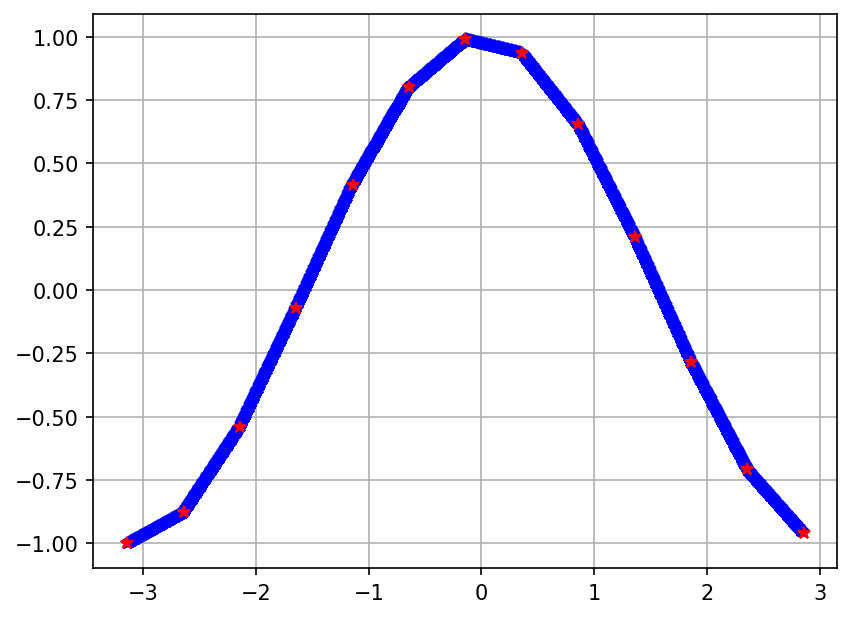

Linear interpolate: 


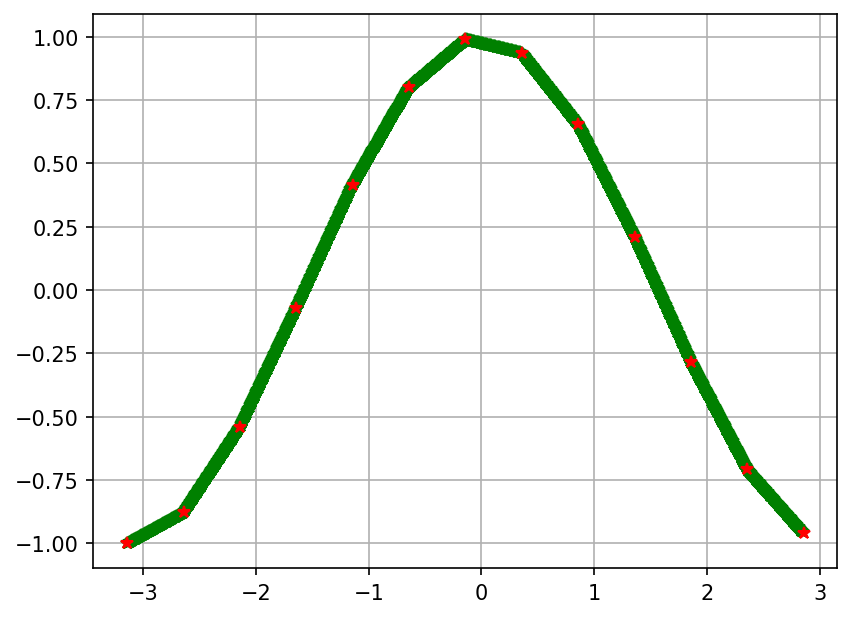

Our linear time:  0.08771419525146484
Linear time:  0.03244161605834961


Our nearest interpolate: 


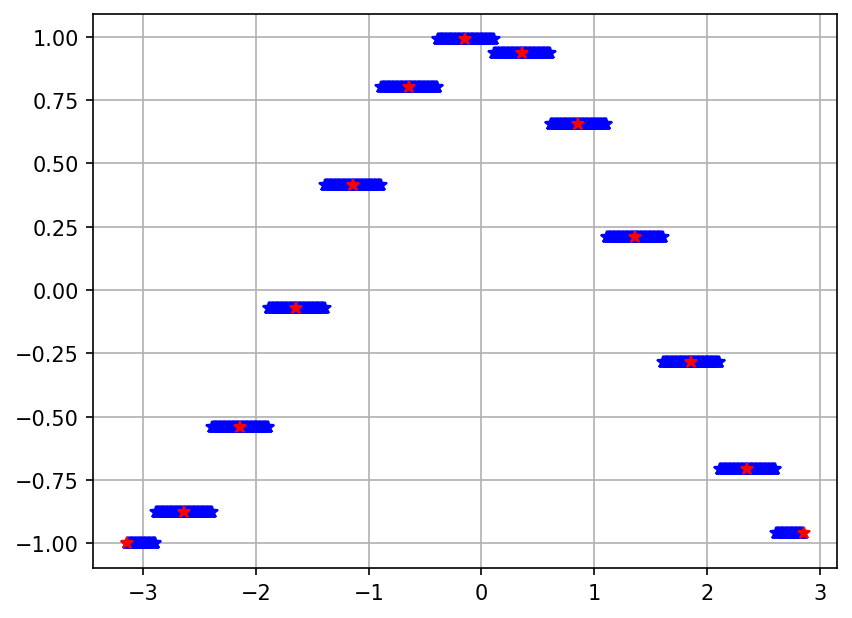

Nearest interpolate: 


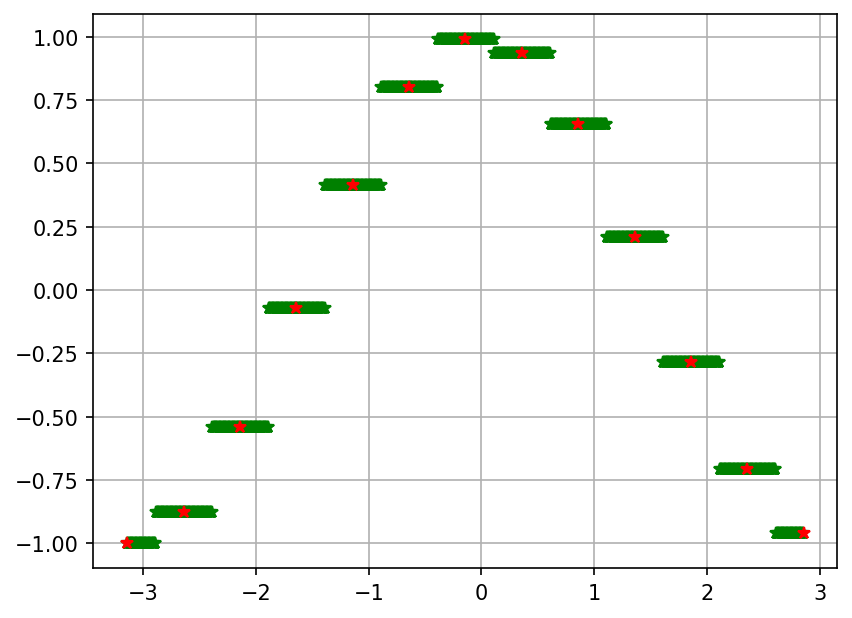

Our nearest time:  0.03465127944946289
nearest time:  0.010387659072875977


In [4]:
#TEST
start = -np.pi
stop = np.pi
step = 0.5
x = np.arange(start, stop, step)

y = np.cos(x)

new_x = np.arange(x[0], x[-1], step / 100)


start = time.time()
our_interp_linear = our_interpolate(x, y, new_x, method='linear')
end = time.time()
t_our_linear = end - start

start = time.time()
interp_linear = interpolate.interp1d(x, y, kind='linear')
f_new_linear = interp_linear(new_x)
end = time.time()
t_linear = end - start

start = time.time()
our_interp_nearest = our_interpolate(x, y, new_x, method='nearest')
end = time.time()
t_our_nearest = end - start

start = time.time()
interp_nearest = interpolate.interp1d(x, y, kind='nearest')
f_new_nearest = interp_nearest(new_x)
end = time.time()
t_nearest = end - start

print("Our linear interpolate: ")
plt.figure(dpi=150)
plt.plot(new_x, our_interp_linear, "b*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()

print("Linear interpolate: ")
plt.figure(dpi=150)
plt.plot(new_x, f_new_linear, "g*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()
print("Our linear time: ", t_our_linear)
print("Linear time: ", t_linear)
print("\n")

print("Our nearest interpolate: ")
plt.figure(dpi=150)
plt.plot(new_x, our_interp_nearest, "b*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()

print("Nearest interpolate: ")
plt.figure(dpi=150)
plt.plot(new_x, f_new_nearest, "g*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()
print("Our nearest time: ", t_our_nearest)
print("nearest time: ", t_nearest)

By convolution:

Second derivative after linear interpolation:


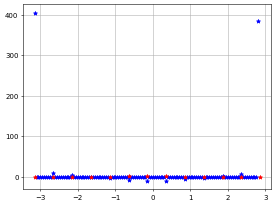

Second derivative after cubic interpolation:


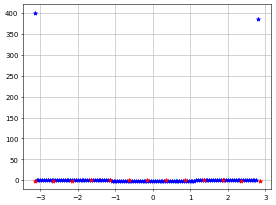

Second derivative after nearest neighbour interpolation:


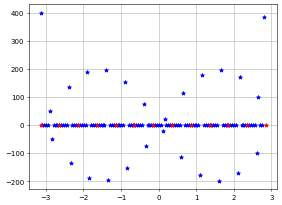


By double derivative:

Second derivative after linear interpolation:


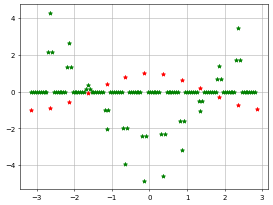

Second derivative after cubic interpolation:


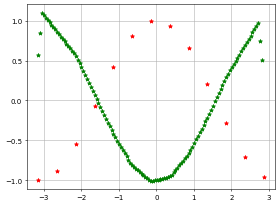

Second derivative after nearest neighbour interpolation:


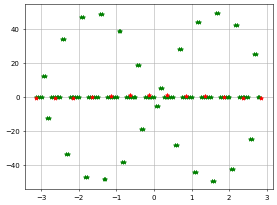

In [6]:
#Zad2
'''Porównaj zachowanie drugiej pochodnej liczoną za pomocą konwolucji jak i
podwójnego obliczenia pierwszej pochodnej (analogicznie do Laboratorium 2)
danych po różnych typach interpolacji (najbliższego sąsiada, liniowa, kwadratowa,
kubiczna, wybranej radialnej funkcji bazowej).'''

#Generate the function
start = -np.pi
stop = np.pi
step = 0.5
x = np.arange(start, stop, step)

y = np.cos(x)

new_x = np.arange(x[0], x[-1], step / 10)

#interpolation
interp_linear = interpolate.interp1d(x, y, kind='linear')       #!
interp_cubic = interpolate.interp1d(x, y, kind='cubic')         #!
interp_nearest = interpolate.interp1d(x, y, kind='nearest')     #!

f_new_linear = interp_linear(new_x)
f_new_cubic = interp_cubic(new_x)
f_new_nearest = interp_nearest(new_x)

#calculate second derivative by convolution
def second_der_conv(f, h):
  kernel = np.array([1, -2, 1]) / (h**2)
  return np.convolve(f, kernel, mode='same')                    #!

#calculate second derivative by double derivative
def second_der(f, h):
  der = np.gradient(f, h)
  second_der = np.gradient(der, h)                              #!
  return second_der

#step
h = new_x[1] - new_x[0]

print("By convolution:\n")

print("Second derivative after linear interpolation:")
f1 = second_der_conv(f_new_linear, h)

plt.figure(dpi=50)
plt.plot(new_x, f1, "b*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()

print("Second derivative after cubic interpolation:")
f2 = second_der_conv(f_new_cubic, h)

plt.figure(dpi=50)
plt.plot(new_x, f2, "b*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()

print("Second derivative after nearest neighbour interpolation:")
f3 = second_der_conv(f_new_nearest, h)

plt.figure(dpi=50)
plt.plot(new_x, f3, "b*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()

print("\nBy double derivative:\n")

print("Second derivative after linear interpolation:")
f4 = second_der(f_new_linear, h)

plt.figure(dpi=50)
plt.plot(new_x, f4, "g*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()

print("Second derivative after cubic interpolation:")
f5 = second_der(f_new_cubic, h)

plt.figure(dpi=50)
plt.plot(new_x, f5, "g*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()

print("Second derivative after nearest neighbour interpolation:")
f6 = second_der(f_new_nearest, h)

plt.figure(dpi=50)
plt.plot(new_x, f6, "g*")
plt.plot(x, y, 'r*')
plt.grid(True)
plt.show()